# Laboratorio 4: SISTEMA DE ECUACIONES LINEALES. FORMA MATRICIAL. MÉTODO DE GAUSS. MÉTODO DE LA INVERSA. REGLA DE CRAMER

## Integrantes:

- Escriba Flores, Daniel Agustin
- Garcia Delgado, Luis Anthony Cristobal

---

In [1]:
# Importamos las librerias

import pandas as pd
import numpy as np
from IPython.display import Image
from sklearn.linear_model import LinearRegression

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')


## Parte A

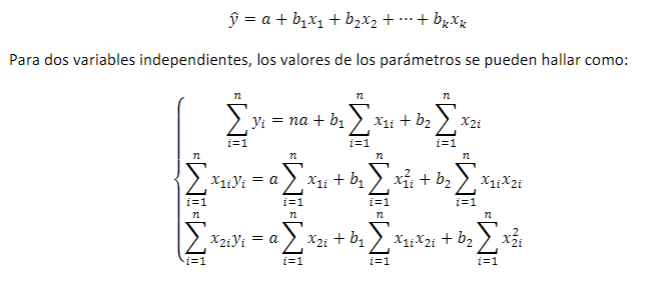

In [2]:
# Insetamos la Imagen

Image("regremultiple.png")

In [3]:
# Leemos los datos
data = pd.read_csv("publicidad.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
#Eliminamos la variable Newspaper
data = data.drop(["Newspaper"], axis = 1)
data

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


In [5]:
# Calculamos las medias 

x1_barra = np.mean(data['TV'])
x2_barra = np.mean(data['Radio'])
y_barra = np.mean(data['Sales'])

print("x1_barra (TV):", x1_barra, "\nx2_barra (Radio):", x2_barra, "\ny_barra (Sales):", y_barra)


x1_barra (TV): 147.0425 
x2_barra (Radio): 23.264000000000006 
y_barra (Sales): 14.0225


## Parte B

In [6]:
## Calculamos las sumatorias de las ecuaciones de regresion

suma_y = sum(data['Sales'])
suma_xy1 = sum(data['TV'] * data['Sales'])
suma_xy2 = sum(data['Radio'] * data['Sales'])
suma_x1 = sum(data['TV'])
suma_x2 = sum(data['Radio'])
suma_x12 = sum(data['TV'] ** 2)
suma_x22 = sum(data['Radio'] ** 2)
suma_x1x2 = sum(data['TV'] * data['Radio'])

print("Suma_y =", suma_y)
print("suma_xy1 (TV * Sales) =", suma_xy1, "\nsuma_xy2 (Radio * Sales) =", suma_xy2)
print("suma_x1 (TV) =", suma_x1, "\nsuma_x2 (Radio) =", suma_x2)
print("suma_x12 (TV^2) =", suma_x12, "\nsuma_x22 (Radio^2) =", suma_x22)
print("suma_x1x2 (TV * Radio) =", suma_x1x2)


Suma_y = 2804.5
suma_xy1 (TV * Sales) = 482108.34 
suma_xy2 (Radio * Sales) = 74126.39
suma_x1 (TV) = 29408.5 
suma_x2 (Radio) = 4652.8
suma_x12 (TV^2) = 5791118.39 
suma_x22 (Radio^2) = 152107.86
suma_x1x2 (TV * Radio) = 698061.98


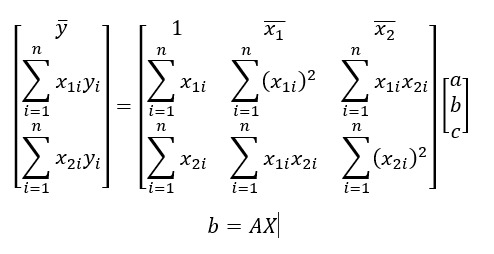

In [7]:
# Representacion Matricial
Image("representacion.jpeg")

In [8]:
# Imprimimos  la matriz de coeficientes A y la matriz de terminos independiente B
A = np.array([[1, x1_barra, x2_barra],
              [suma_x1, suma_x12, suma_x1x2],
              [suma_x2, suma_x1x2, suma_x22]])

b = np.array([y_barra, suma_xy1, suma_xy2])

print("A =\n", A)
print("\nb =", b)

A =
 [[1.00000000e+00 1.47042500e+02 2.32640000e+01]
 [2.94085000e+04 5.79111839e+06 6.98061980e+05]
 [4.65280000e+03 6.98061980e+05 1.52107860e+05]]

b = [1.4022500e+01 4.8210834e+05 7.4126390e+04]


In [9]:
# verificamos la existencia de la inversa de la matriz A

detA= np.linalg.det(A)
print(detA)

64148910600.10878


## Parte C

In [10]:
# Aplicamos el metodo de la inversa

invA = np.linalg.inv(A)
x_sol = np.dot(invA, b.T)
print("Coeficientes (a, b1, b2):", x_sol)


Coeficientes (a, b1, b2): [2.92109991 0.04575482 0.18799423]


In [11]:
# verificamos la solucion con la funcion LinearRegression()

X = data[["TV", "Radio"]]  # Variables independientes
y = data["Sales"]  # Variable dependiente

rlm = LinearRegression()
rlm.fit(X, y)

# Mostramos los coeficientes en un dataframe

coef1 = pd.DataFrame(rlm.coef_, ['TV', 'Radio'], columns=['Coeficientes'])
coef2 = pd.DataFrame(rlm.intercept_, ['Intercepto'], columns=['Coeficientes'])
coeficientes = pd.concat([coef1, coef2], axis=0)
coeficientes


,Coeficientes
TV,0.045755
Radio,0.187994
Intercepto,2.921100


In [12]:
# Escribimos la Ecuacion de regresion Estimada

print("Sales_est = {:.4f}(TV) + {:.4f}(Radio) + {:.4f}".format(
    coeficientes['Coeficientes'][0],  # Coeficiente de TV
    coeficientes['Coeficientes'][1],  # Coeficiente de Radio
    coeficientes['Coeficientes'][2])) # Intercepto


Sales_est = 0.0458(TV) + 0.1880(Radio) + 2.9211
